# Proyecto ecuacion de calor en Python
Utilizando el metodo de diferencias finitas para resolver la ecuacion en dos dimensiones espaciales.

In [3]:
import numpy as np

def ftcs_calor(Th, Tc, kappa, L, a, M, N, h, t_fin):
    # Condiciones iniciales
    T = np.full((M+1, N+1), Tc, dtype=float)
    T[24:27, 24:27] = Th

    #Los otros parametros
    t = 0.0
    dy= a / (N - 1)  #Particiones del ancho
    dx = L / (M - 1)  #Partciones del largo

    its = 0

    #Para la animacion
    tsteps = int(t_fin / h)
    shape = np.zeros((tsteps + 2, M+1, N+1), dtype=float)

    #Aqui se implementa el FTCS
    while t < t_fin:
        #arreglo para hacer las operaciones con FTCS
        Tk = T.copy()
        for i in range(0, M):
            for j in range(0, N):
               if i < 24 or i > 26 or j < 24 or j > 26:
                    Tk[i, j] = (((kappa*h)/(dy*dx)) * ((dy/dx) * (T[i-1, j] + T[i+1, j] - 2*T[i, j])) + ((kappa*h)/(dy*dx)) * ((dx/dy) * (T[i, j+1] + T[i, j-1] - 2*T[i, j])) + T[i, j])

        T = Tk.copy()
        t += h
        its += 1
        shape[its] = T.copy()
    return T, its, shape
    

In [17]:
valores, iteraciones, shape = ftcs_calor(100.0, 20.0, 98.8e-6, 0.3, 0.3, 50, 50, 1e-2, 20.0)
print(iteraciones)

2000


Grafico de calentamiento de la placa, sin animar:

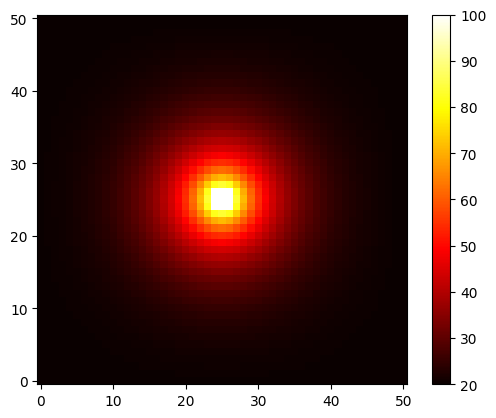

In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(valores, origin='lower', cmap='hot')
plt.colorbar()
plt.show()

### Animacion
Este dura 20 segundos:

In [19]:
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import imshow
from IPython import display

fig, ax = plt.subplots()
heatmap = ax.imshow(valores, cmap='hot', interpolation='nearest')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

def animate(frame):
    dato = shape[frame, :, :]
    heatmap.set_data(dato)
    return heatmap
    
anim = FuncAnimation(fig, animate, frames = iteraciones, interval = 10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

## Animacion 2
Para comparar, duro 6 minutos, pero se modifico el intervalo en la funcion Funcanimation para apreciar el efecto en menos tiempo:

In [20]:
valores_2, iteraciones_2, shape_2 = ftcs_calor(100.0, 20.0, 98.8e-6, 0.3, 0.3, 50, 50, 1e-2, 360.0)
print(iteraciones_2)

36001


In [21]:
fig_2, ax_2 = plt.subplots()
heatmap = ax_2.imshow(valores_2, cmap='hot', interpolation='nearest')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

def animate_2(frame):
    dato = shape_2[frame, :, :]
    heatmap.set_data(dato)
    return heatmap
    
anim = FuncAnimation(fig_2, animate_2, frames = iteraciones_2, interval = 10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()